In [2]:
import sys
sys.path.append("..")
import src.data.preprocessing as p
# Enable module reloading
%load_ext autoreload
%autoreload 2
from datetime import datetime
import numpy as np
from numpy import expand_dims
from numpy.random import randint
from tensorflow.keras.datasets.cifar10 import load_data
import tensorflow as tf
import sys
sys.path.append("..")
from src.models.c_dcgan import GanRGB
from src.models.train_helpers import CGanTrainer
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

%matplotlib inline

### Load preprocessed data as bounding boxes

In [3]:
dataset, labels_mapping = p.get_image_generator('../data/train/relationships.csv', '../../data/DATA/imgs_numpy/',
                                  normalize=True, size=(64,64), number_of_images=2000)

In [4]:
images, labels = dataset

In [5]:
images.shape

(20903, 64, 64, 3)

In [24]:
def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    images, labels = images[ix], labels[ix]
    return [images, labels]


# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, callbacks, n_epochs=100, n_batch=128):

    logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    file_writer = tf.summary.create_file_writer(logdir + "/metrics")

    trainer = CGanTrainer(d_model, g_model, gan_model, batch_size=n_batch, n_classes=10, noise_dim=latent_dim)
    half_batch = int(n_batch / 2)
    bat_per_epoch = int(dataset[0].shape[0] / n_batch)
    callbacks.on_train_begin()
    for i in range(n_epochs):
        r_losses = []
        f_losses = []
        g_losses = []
        
        for _ in range(bat_per_epoch):
            images, labels = generate_real_samples(dataset, half_batch)
            real_loss, fake_loss, gan_loss = trainer.train_step(images, labels, i)
            r_losses.append(real_loss)
            f_losses.append(fake_loss)
            g_losses.append(gan_loss)
#             print('Epoch: ', i,'\ losses: ', real_loss, fake_loss, gan_loss)
        with file_writer.as_default():
            tf.summary.scalar('real loss', data=np.mean(r_losses), step=i)
            tf.summary.scalar('fake loss', data=np.mean(f_losses), step=i)
            tf.summary.scalar('gan loss', data=np.mean(g_losses), step=i)
            plot_buf = trainer.create_fig(i)
            image = tf.image.decode_png(plot_buf.getvalue(), channels=4)
            image = tf.expand_dims(image, 0)
            tf.summary.image('plot', data=image, step=i)
        
    
    print('EPOCH:', 0)
    # callbacks.on_train_end('_')
    g_model.save('cgan_generator.h5')

[autoreload of src.models.c_dcgan failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/usr/local/lib/python3.6/dist-packages/IPytho

In [25]:
latent_dim = 100
image_shape = (64, 64, 3)
gan = GanRGB(image_shape)
d_model = gan.discriminator
g_model = gan.generator
gan_model = gan.combined

log_path = './logs'
callback = tf.keras.callbacks.TensorBoard(log_path)
callback.set_model(gan_model)

0 0.6681988 0.6962763 0.69090134
0 0.47279102 0.70207953 0.6855461
0 0.33424807 0.7173969 0.6715285
0 0.18529476 0.7559549 0.639732
0 0.11480233 0.84108 0.5889931
0 0.07719093 0.97316664 0.55259204
0 0.07995978 1.0446615 0.5776739
0 0.12479492 0.91992545 0.7522029
0 0.1754022 0.67101645 1.0498035
0 0.26156238 0.56026506 1.1368442
0 0.34610248 0.6228343 0.9516483
0 0.3614308 0.738086 0.7683945
0 0.3544883 0.8098315 0.6780449
0 0.19199482 0.82635045 0.67863333
0 0.23429374 0.80324703 0.7010097
0 0.27132887 0.7684566 0.75366986
0 0.25175658 0.7215086 0.83848596
0 0.20065676 0.680984 0.9405047
0 0.107734494 0.6738757 1.0216389
0 0.04334914 0.65359306 1.0236728
0 0.025960157 0.66441697 0.9232009
0 0.017709829 0.6884014 0.82097316
0 0.024601378 0.7363313 0.74120516
0 0.022331722 0.79840267 0.68536973
0 0.06485211 0.89091516 0.6284816
0 0.07234457 1.021347 0.6279664
0 0.13674656 1.0725664 0.6290635
0 0.19869702 1.0788022 0.6537057
0 0.0711273 0.8790237 0.8847864
0 0.17756487 0.5693995 1.20654

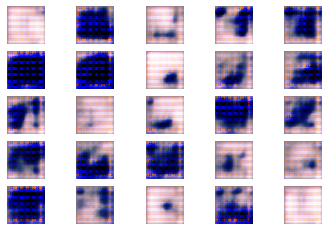

1 0.37135446 0.26630798 2.1426077
1 0.3098895 0.32734418 2.128732
1 0.3867855 0.54651266 1.8389362
1 0.4353128 0.5408701 1.598923
1 0.46139148 0.6500583 1.6583674
1 0.5909568 0.4873731 1.8311563
1 0.73838556 0.4636643 1.8464276
1 0.6059996 0.6998476 2.1882215
1 0.55341816 0.39358324 2.28568
1 0.56244016 0.3844355 2.409039
1 0.59993947 0.51376355 2.7687273
1 0.52235436 0.3489466 2.3815625
1 0.5105619 0.28425622 2.4134052
1 0.41773188 0.31366545 2.209875
1 0.47181684 0.3051541 2.2370899
1 0.48194668 0.35303462 2.4393697
1 0.47346437 0.33919314 2.3111591
1 0.4493873 0.28525412 2.3368082
1 0.57216275 0.3329993 2.0277677
1 0.37536782 0.25501716 2.3383043
1 0.49770364 0.25557166 2.0297825
1 0.45049927 0.46230638 2.2004986
1 0.5552535 0.35844278 2.2484522
1 0.5892652 0.35542154 2.1975992
1 0.43614966 0.35005382 2.256204
1 0.51263946 0.26008666 2.4633684
1 0.4979861 0.2878873 2.3026028
1 0.54151654 0.34327102 2.151462
1 0.53531134 0.49820134 2.2050412
1 0.657166 0.49464113 2.2895265
1 0.573316

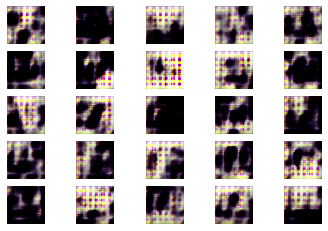

2 0.40933612 0.2700398 2.2131371
2 0.38541394 0.3464738 2.207762
2 0.42458797 0.2570066 2.0239131
2 0.33985704 0.34132317 2.0933585
2 0.39189696 0.28646767 2.2180123
2 0.43696472 0.37464327 2.1802564
2 0.52397645 0.44400126 2.0662985
2 0.3881746 0.4541963 2.2130651
2 0.5680171 0.5395819 1.7729727
2 0.39997646 0.45504534 1.7050717
2 0.54459524 0.6252674 1.5909314
2 0.5592834 0.63209975 1.544381
2 0.54601425 0.6341654 1.8547612
2 0.5145298 0.33541083 1.9339513
2 0.48816913 0.30672967 2.080509
2 0.44789854 0.42973062 1.9837229
2 0.36078763 0.40178135 1.9726228
2 0.33117756 0.5261662 1.9516816
2 0.459145 0.4904679 1.627008
2 0.49751303 0.75735164 1.3165051
2 0.439627 0.68680036 1.2791102
2 0.4329255 1.0706613 1.2687819
2 0.42824578 0.53566164 1.7150846
2 0.41549706 0.5849214 1.8787488
2 0.35549712 0.4854646 2.1158342
2 0.33864957 0.3843828 2.183601
2 0.33654636 0.39149892 2.013866
2 0.34781006 0.44674194 2.067199
2 0.38784045 0.50092006 2.2896664
2 0.49214706 0.29469186 2.3370554
2 0.35980

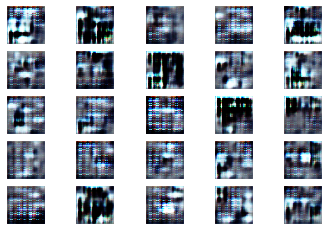

3 0.3299391 0.46384057 1.7478232
3 0.4267305 0.4725731 1.8114465
3 0.3892669 0.5496155 1.641094
3 0.47566172 0.5113068 1.8487469
3 0.50748754 0.3957941 2.0910385
3 0.47621095 0.41158706 2.0664287
3 0.42404246 0.5086186 1.7702701
3 0.36325586 0.5798184 1.925607
3 0.55358565 0.4362702 1.7849791
3 0.47645265 0.5855408 1.5342488
3 0.4841686 0.56853557 1.6541398
3 0.5092691 0.53391564 1.8990073
3 0.5146454 0.4129206 1.7306373
3 0.4931981 0.51244307 1.7052424
3 0.46008128 0.6481661 1.8745518
3 0.44350857 0.44014114 1.9508253
3 0.56694597 0.38833904 1.8977165
3 0.5446725 0.42333972 1.5349712
3 0.5170719 0.5710452 1.7715538
3 0.49754047 0.5213031 1.9884777
3 0.42494023 0.50431836 1.8289822
3 0.5019506 0.39821154 1.8273792
3 0.37075654 0.46538508 2.015669
3 0.43633336 0.38709795 1.9005868
3 0.4757697 0.4433297 1.8473622
3 0.50527924 0.51595986 1.8773284
3 0.40795225 0.42301878 1.8795903
3 0.56858754 0.4580776 1.6652057
3 0.4359235 0.5465721 1.6455442
3 0.40572843 0.48199546 1.5046692
3 0.335905

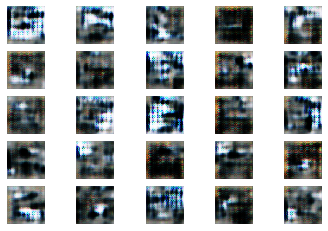

4 0.43254924 0.67222077 1.6282294
4 0.6228021 0.5548086 1.3593938
4 0.4250294 0.52377737 1.6190283
4 0.40140277 0.655348 1.5402194
4 0.50557804 0.7785383 1.4596847
4 0.504952 0.58086073 1.5859811
4 0.39784402 0.45530593 1.6405497
4 0.44830045 0.47805429 1.7192454
4 0.3222295 0.57564163 1.8403214
4 0.36385873 0.60817957 1.9651761
4 0.39321828 0.5115253 1.6867566
4 0.45836097 0.6034651 1.7696531
4 0.35695976 0.66422105 1.9889458
4 0.48359722 0.4742308 2.5862346
4 0.41258475 0.34733647 2.7155123
4 0.4823564 0.440948 2.2991247
4 0.4438573 0.79171056 1.7568029
4 0.5440384 0.5579622 2.4865186
4 0.37622875 0.33252725 3.1944592
4 0.47535026 0.4292825 2.150218
4 0.49914238 0.62199605 1.9309822
4 0.34910762 0.76721483 1.8922417
4 0.47635597 0.49214062 1.8239644
4 0.47649604 0.41944927 2.2538993
4 0.6006087 0.31660858 2.2586412
4 0.40577328 0.38534328 2.4503338
4 0.62665594 0.3696518 2.1087039
4 0.43604514 0.38114315 1.9453523
4 0.5165144 0.62543964 1.8229898
4 0.47198683 0.585114 1.6522101
4 0.4

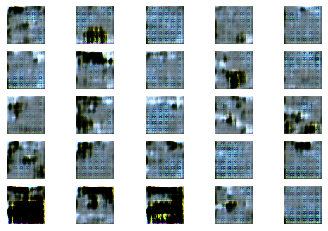

5 0.3828453 0.57337916 1.6915195
5 0.4193918 0.50073767 1.7380953
5 0.54411936 0.47643432 1.7593033
5 0.40350717 0.40068305 1.5430278
5 0.31850442 0.4687815 1.8886192
5 0.39889267 0.45580673 1.899794
5 0.39794725 0.37271547 2.0698416
5 0.5721395 0.40768528 1.9259206
5 0.3604403 0.4740367 1.9079175
5 0.35391077 0.5534545 2.022472
5 0.39155328 0.41381395 2.0346236
5 0.4775912 0.5178826 1.9760913
5 0.596532 0.5622729 1.5654633
5 0.531917 0.5946576 1.6601305
5 0.4536329 0.7403364 1.7058101
5 0.507671 0.57602155 1.7635348
5 0.5157414 0.54568076 1.8254828
5 0.47219878 0.4815641 1.9449722
5 0.64966536 0.40526575 2.043761
5 0.56799835 0.46484774 2.011902
5 0.5265876 0.3561209 1.9141283
5 0.5061463 0.4713784 1.9787511
5 0.5264579 0.39934963 1.8871058
5 0.5691623 0.45405883 1.9051393
5 0.49768317 0.5185241 1.9433551
5 0.6029383 0.54166126 1.6798323
5 0.5927137 0.58654505 1.5299331
5 0.49223408 0.6255394 1.7383714
5 0.5258593 0.65425634 1.3899434
5 0.46273497 0.63330996 1.4373026
5 0.46266997 0.6

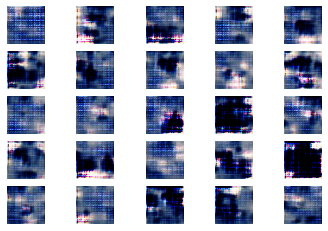

6 0.38817638 0.598167 1.8940916
6 0.4390251 0.33994716 2.1776996
6 0.3491853 0.42053378 2.2883697
6 0.47389525 0.3788659 2.2609906
6 0.5077678 0.29912096 2.3915958
6 0.32310915 0.23441708 2.3710423
6 0.4116204 0.3686097 2.2107644
6 0.5116819 0.38276732 2.0226939
6 0.32858023 0.3993231 1.6936426
6 0.33162147 0.5913958 1.6613193
6 0.35026032 0.58937186 1.6601713
6 0.49330452 0.5925927 1.4244372
6 0.40436408 0.5927996 1.5842962
6 0.5017155 0.52221256 1.580771
6 0.5224855 0.49322012 1.6485667
6 0.50768125 0.37653428 1.7384422
6 0.40582508 0.4580856 1.8614253
6 0.38029134 0.6838721 2.0852401
6 0.5659686 0.47888744 2.3440495
6 0.52697843 0.3716986 2.3068602
6 0.6094345 0.4102006 2.1984575
6 0.620254 0.37235403 2.1571903
6 0.44437578 0.39456797 2.1490018
6 0.50207734 0.42626137 2.153636
6 0.49770987 0.35314405 2.110079
6 0.50940716 0.39070764 2.1964405
6 0.47958124 0.31440392 2.0336525
6 0.44272608 0.39866266 1.9274642
6 0.3947074 0.46104902 1.845807
6 0.4375028 0.42969346 1.7766302
6 0.45896

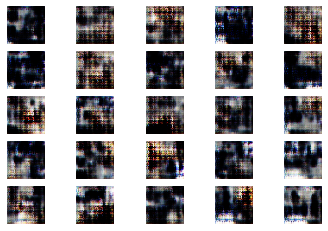

7 0.45124185 0.50291497 2.1923733
7 0.48804379 0.33202022 2.1516526
7 0.4710688 0.40603828 2.052068
7 0.5544042 0.4229204 2.0179098
7 0.55988765 0.42676902 2.0806892
7 0.49118996 0.57836205 1.6005106
7 0.35809794 0.47413793 1.6808192
7 0.4704145 0.7821518 1.9233849
7 0.44772074 0.49423313 2.0304408
7 0.4907247 0.3878299 2.168837
7 0.4286835 0.31492054 2.2120147
7 0.51027596 0.34232935 2.2098193
7 0.35844785 0.42926893 2.080212
7 0.36066297 0.5194497 2.1814551
7 0.5080415 0.4953894 2.0753486
7 0.53696454 0.3682619 1.8655597
7 0.4798188 0.600672 1.7458808
7 0.43071246 0.7023596 1.745558
7 0.54900587 0.592912 1.5010846
7 0.35182092 0.62047994 1.7139502
7 0.5698787 0.75387704 1.7897339
7 0.5004803 0.5709393 1.6184772
7 0.50864625 0.48852965 2.0041485
7 0.36466032 0.34714264 2.1862278
7 0.34246802 0.27907687 2.0911078
7 0.37292027 0.64172757 2.1291814
7 0.38219044 0.54784095 1.8172168
7 0.49802887 0.61402696 2.0416446
7 0.4524874 0.5336288 1.7628653
7 0.5858475 0.28996295 1.9054761
7 0.4032

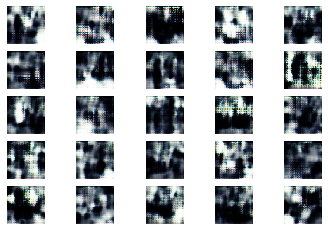

8 0.47442403 0.63988084 1.9244071
8 0.53492486 0.51849633 1.8751944
8 0.49385408 0.53058314 1.5173727
8 0.6250621 0.5657135 1.2015202
8 0.5468042 1.0398327 1.5218422
8 0.59882784 0.87610894 1.8771636
8 0.66338634 0.47168142 2.5168
8 0.6626679 0.2895639 2.9680414
8 0.607261 0.26116028 2.8184748
8 0.45914152 0.2773116 2.5975418
8 0.43045843 0.28265172 2.4725392
8 0.40357664 0.37444562 2.131017
8 0.39789107 0.33153927 2.0733721
8 0.46307984 0.51247203 1.9358804
8 0.34946662 0.48285496 1.6985873
8 0.41295022 0.61513495 1.6662688
8 0.47716957 0.7533803 1.6623437
8 0.52384794 0.5697783 1.4000096
8 0.43897754 0.6531466 1.2623012
8 0.48116398 0.86126333 1.3924837
8 0.42879093 0.59029865 1.7403007
8 0.5007424 0.40536886 1.9408762
8 0.6066619 0.41280586 1.7873313
8 0.55029905 0.40985954 1.8719915
8 0.37553018 0.5651868 1.738075
8 0.49022835 0.4190162 1.791954
8 0.4275753 0.36150134 1.9220484
8 0.4060874 0.40376365 2.2264864
8 0.34381407 0.24809979 2.449403
8 0.46985942 0.28116396 2.3931398
8 0.3

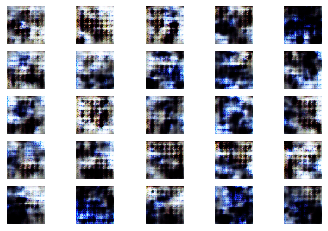

9 0.58649576 0.563141 1.7285582
9 0.5664706 0.56078655 1.8919957
9 0.62453866 0.36497974 1.7898867
9 0.5153879 0.6372106 1.7128509
9 0.47757083 0.4943481 1.96941
9 0.4526776 0.6176496 1.851226
9 0.6012819 0.65200245 1.8572562
9 0.48747137 0.4075966 1.8585656
9 0.676529 0.65322685 1.7197434
9 0.5757136 0.60981876 1.696099
9 0.5513052 0.5220969 1.7527353
9 0.40822148 0.49759468 2.0679717
9 0.4638769 0.49211895 2.142756
9 0.422052 0.5322212 2.3158753
9 0.489756 0.39493495 2.6310143
9 0.59517026 0.3778326 2.3303561
9 0.5089065 0.5917869 2.213086
9 0.48060247 0.35203764 2.319175
9 0.5008329 0.5015334 2.2898366
9 0.57505566 0.29984233 2.130583
9 0.40121907 0.5191506 1.6871371
9 0.48182398 0.52304685 1.7992702
9 0.5191281 0.76638174 1.5359462
9 0.4061155 0.6112226 1.6438788
9 0.37495893 0.50740904 1.6790551
9 0.54309106 0.4809503 1.5132723
9 0.4054018 0.59102434 1.8171256
9 0.4881795 0.615329 1.7863469
9 0.40005144 0.6324659 1.6256313
9 0.5651209 0.7104845 1.5348406
9 0.67759967 0.74910086 1.

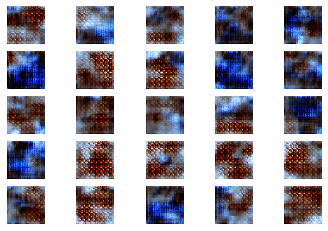

10 0.541814 0.5015712 1.9151531
10 0.426306 0.55445397 1.6088157
10 0.4715819 0.6763566 1.7243958
10 0.52320445 0.63749975 1.6460935
10 0.45568606 0.4475559 1.4532082
10 0.45519948 0.6039018 1.6935135
10 0.32365125 0.54686385 1.7581985
10 0.41916475 0.5556944 1.5701909
10 0.48812777 0.5995353 1.5891392
10 0.4321977 0.4129677 1.7824903
10 0.44605118 0.5662575 1.9003264
10 0.53812647 0.48674384 1.7288215
10 0.5350931 0.49817365 1.7301697
10 0.4117843 0.5777787 1.7829168
10 0.69665915 0.537809 1.6811657
10 0.612164 0.63531446 1.83586
10 0.5201733 0.457499 2.0035622
10 0.57422125 0.37312484 1.7525067
10 0.6475803 0.4801827 1.982023
10 0.43579918 0.38645858 2.144877
10 0.6987287 0.4452292 1.8905869
10 0.4986413 0.410168 1.8571422
10 0.48856914 0.4522605 1.9353697
10 0.50761795 0.28197083 1.9259849
10 0.43270177 0.6054803 1.7037209
10 0.42158088 0.49110702 1.735393
10 0.47950146 0.41457886 1.5313547
10 0.65014124 0.57532775 1.7339867
10 0.43574065 0.6331564 1.6309032
10 0.4003805 0.44473648 

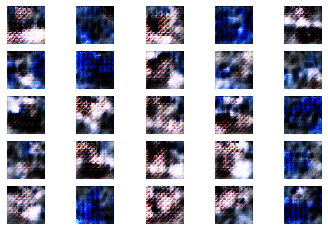

11 0.4845916 0.4322738 2.1714578
11 0.5441435 0.46966556 1.7875751
11 0.52869713 0.45907527 1.7878612
11 0.5077928 0.4812338 1.9665217
11 0.58764386 0.5712788 1.8959405
11 0.50168157 0.56496966 1.6614612
11 0.4721356 0.5814768 1.5934584
11 0.57591754 0.58695674 1.5791829
11 0.50587636 0.60401523 1.5129074
11 0.522889 0.53848314 1.3660823
11 0.423407 0.59900373 1.6553538
11 0.45940077 0.5973393 1.6028762
11 0.41995934 0.6758373 1.6744225
11 0.5284166 0.5332395 1.8461792
11 0.5957638 0.43969333 1.7579992
11 0.4449004 0.4849503 1.8124596
11 0.50288785 0.5180342 1.8469398
11 0.53288686 0.5019841 2.0026038
11 0.48377082 0.4893451 2.0992093
11 0.512753 0.37401873 1.9280024
11 0.43129107 0.49365503 1.7724816
11 0.49538964 0.5381608 1.8470912
11 0.40006742 0.5377352 1.937124
11 0.50560606 0.5383251 1.8199853
11 0.48127612 0.45567423 1.7729456
11 0.48240668 0.52968466 1.8155484
11 0.43032998 0.7083076 1.6840336
11 0.42037538 0.48619178 1.711347
11 0.5309143 0.4913212 1.6308851
11 0.56285095 0.5

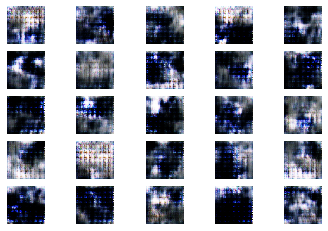

12 0.5392005 0.5442286 1.5308454
12 0.45918486 0.7332462 1.4220824
12 0.6108526 0.7441778 1.5454069
12 0.62806344 0.6987024 1.3575071
12 0.5121606 0.69032586 1.7414725
12 0.54369235 0.48291624 1.9006468
12 0.45792443 0.34385926 2.3649795
12 0.6601826 0.3664492 2.2658951
12 0.5279188 0.33442545 2.1742187
12 0.44799268 0.31146908 2.147865
12 0.3848234 0.31540293 2.0123692
12 0.4296154 0.4231779 1.9246023
12 0.42957813 0.4041898 1.6291848
12 0.5158518 0.6432371 1.6614131
12 0.43821552 0.5615245 1.598513
12 0.39229047 0.5601219 1.3949655
12 0.4608209 0.58961487 1.3122749
12 0.41633728 0.5780307 1.5962102
12 0.45194313 0.5378728 1.5034481
12 0.40766507 0.5593033 1.6488253
12 0.3606369 0.5131857 1.7596796
12 0.47394913 0.54077506 1.8623939
12 0.39022386 0.47260255 1.7649996
12 0.39435357 0.47200954 1.8399982
12 0.4434687 0.48913947 1.6583412
12 0.4172817 0.40085548 1.5748849
12 0.36801854 0.5808897 1.7174804
12 0.42161518 0.46189052 1.9013908
12 0.34661672 0.47053176 1.8016845
12 0.33474296 

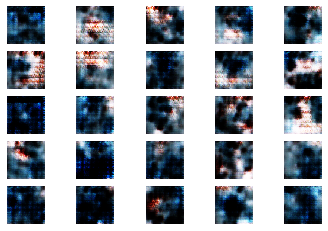

13 0.59453344 0.6570313 1.6306577
13 0.5398028 0.50988567 1.5153548
13 0.4099068 0.5494393 1.4862903
13 0.46647918 0.6277983 1.6578636
13 0.41822603 0.43698984 1.7332116
13 0.6051495 0.517431 1.9281391
13 0.47207677 0.40840954 1.7206833
13 0.53400505 0.38654572 1.8499715
13 0.554914 0.54098177 1.7478232
13 0.3767028 0.53481513 1.4802573
13 0.46202126 0.542086 1.5310162
13 0.5694352 0.57055104 1.5685723
13 0.63661516 0.7519323 1.9958941
13 0.5173608 0.42390156 2.1439795
13 0.68176574 0.26066566 2.188585
13 0.5910903 0.3424683 2.0851111
13 0.44192657 0.41576734 2.0340352
13 0.36565477 0.38362962 2.045111
13 0.36175156 0.5197474 1.8762734
13 0.43227056 0.56200063 1.8238891
13 0.4637123 0.55262244 1.7196723
13 0.5171174 0.5380886 1.5722297
13 0.5108096 0.5516177 1.8973427
13 0.4669656 0.49202368 1.919718
13 0.482221 0.4640898 2.047679
13 0.4229787 0.32949245 2.09077
13 0.44195837 0.447988 2.0654874
13 0.54638743 0.39544752 2.1432116
13 0.4160862 0.39920786 1.8963796
13 0.34742785 0.5153707

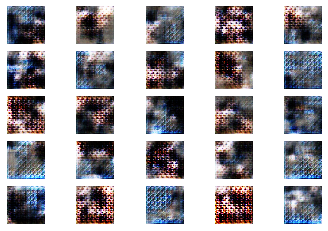

14 0.42211074 0.69033945 1.5889971
14 0.4377092 0.5247435 1.7463987
14 0.36608928 0.55008173 1.9192355
14 0.55084336 0.55696094 1.8260705
14 0.4045162 0.37922734 1.8860284
14 0.4379521 0.61439323 1.6595759
14 0.5830438 0.5509351 1.5614538
14 0.45569006 0.4999316 1.6638126
14 0.4903364 0.6103307 1.5377022
14 0.41450596 0.5671365 1.6284614
14 0.33745432 0.7635975 1.6599704
14 0.509313 0.4270591 1.8887272
14 0.4704401 0.63264227 1.4867373
14 0.572538 0.47269782 1.4795195
14 0.5524837 0.4812973 1.7354399
14 0.506018 0.68168557 1.6847713
14 0.63221616 0.45706373 1.7152708
14 0.53342295 0.58039397 1.5705969
14 0.52608967 0.5401003 1.6720588
14 0.57128847 0.53457737 1.5035219
14 0.46074718 0.6380989 1.5938559
14 0.5037941 0.6052916 1.8548874
14 0.47144538 0.41625333 1.9704733
14 0.4641973 0.48130554 2.0461876
14 0.44383395 0.48344988 1.7896459
14 0.34494346 0.40421504 1.9603599
14 0.4106509 0.5215501 1.8492908
14 0.43712524 0.5244522 1.757788
14 0.503766 0.6650095 1.5884603
14 0.48507676 0.61

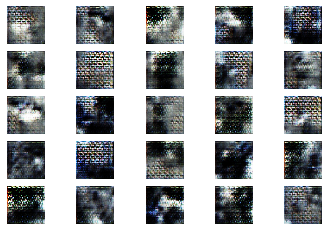

15 0.57711744 0.40303728 1.818939
15 0.5701941 0.5099483 1.8180715
15 0.45488724 0.5585813 1.7543081
15 0.5263753 0.6749275 1.6340504
15 0.49545228 0.5238576 2.0648518
15 0.47732276 0.48492697 2.0398922
15 0.4936037 0.44006452 2.017899
15 0.54902107 0.39851475 1.9566652
15 0.42307922 0.44101995 2.1219106
15 0.47891092 0.46958944 1.8100603
15 0.56927955 0.5759015 1.5656039
15 0.5054674 0.4743448 1.5592923
15 0.47143507 0.5227322 1.6061516
15 0.46807796 0.51676714 1.4993157
15 0.45256883 0.65787953 1.5913287
15 0.40838677 0.4110592 1.7454263
15 0.52690184 0.5350168 1.5808364
15 0.5146129 0.5494624 1.4460629
15 0.5919147 0.64138687 1.6077751
15 0.5018068 0.60872877 1.5860627
15 0.47741032 0.62225056 1.6187544
15 0.6055943 0.5450419 1.5572219
15 0.588966 0.5795184 1.7045705
15 0.4677369 0.5121807 1.851589
15 0.5123857 0.36827886 1.859308
15 0.53073406 0.54811263 1.6024042
15 0.41262102 0.44963443 1.6984501
15 0.586217 0.5835006 1.8906403
15 0.39343208 0.3564222 1.690142
15 0.5489452 0.3916

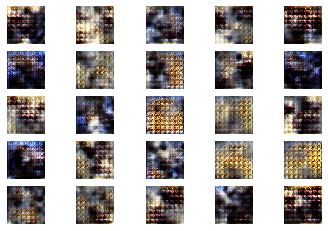

16 0.4385534 0.49747282 2.2804618
16 0.47114384 0.47794774 1.7714213
16 0.3518876 0.4862662 1.7652031
16 0.45595887 0.7089672 1.5963932
16 0.38484883 0.6289568 1.32109
16 0.41979653 0.68867385 1.5200386
16 0.4925222 0.8442335 1.4657338
16 0.53130996 0.6243459 1.5461128
16 0.5705361 0.5984671 1.8913012
16 0.51487905 0.44863644 2.0250802
16 0.5549803 0.43319738 2.2008202
16 0.44511828 0.2979645 2.1997821
16 0.48085725 0.41698602 2.135395
16 0.42262787 0.78587127 1.6326516
16 0.57342935 0.691502 1.4767723
16 0.44956237 0.79552007 1.3383026
16 0.5512135 0.58267546 1.4570637
16 0.49473476 0.56753516 1.3696699
16 0.45383155 0.7692386 1.5890799
16 0.43522304 0.58290744 1.7000444
16 0.48884416 0.44638065 1.7826767
16 0.4045108 0.4639747 1.8111644
16 0.51515377 0.41083825 1.7833741
16 0.5042357 0.4864347 1.9602464
16 0.44657767 0.6031594 1.9965674
16 0.4326238 0.48931557 2.076299
16 0.3623191 0.58391726 1.9361589
16 0.5277815 0.607679 2.0851865
16 0.43730396 0.5415616 1.9268342
16 0.49839413 0.

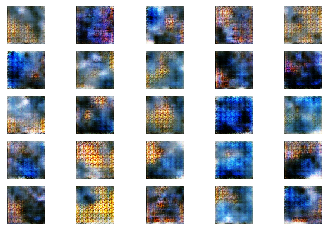

17 0.3784175 0.570341 2.153392
17 0.43571556 0.9087788 2.3089993
17 0.48187864 0.6014797 2.0145998
17 0.7039723 0.45778504 2.0986638
17 0.5154048 0.7267277 2.1743565
17 0.5000808 0.5834304 2.0707269
17 0.5505094 0.63097566 2.1329587
17 0.570107 0.5270468 1.9234862
17 0.675918 0.43736464 1.9249494
17 0.55435544 0.44510657 2.177798
17 0.7572505 0.46768236 1.9559836
17 0.6826165 0.3367468 2.347711
17 0.49852687 0.30266804 2.282265
17 0.4810879 0.2582333 2.0665221
17 0.4774818 0.55625296 2.0496182
17 0.45973545 0.44598 1.9257685
17 0.5985929 0.4890316 2.1291342
17 0.6101252 0.3014064 1.7937546
17 0.59921396 0.3980888 1.5970786
17 0.401159 0.5826515 1.56245
17 0.4420599 0.64511514 1.6720352
17 0.5202456 0.4986205 1.8092372
17 0.53083104 0.5369159 1.6351986
17 0.46303347 0.61719465 1.7899382
17 0.41664279 0.392988 1.576722
17 0.46338996 0.53909075 1.6025763
17 0.3109339 0.48438472 1.6680665
17 0.3536335 0.82550985 1.9252045
17 0.4654993 0.60619676 1.8507456
17 0.34251007 0.59513307 1.9598567

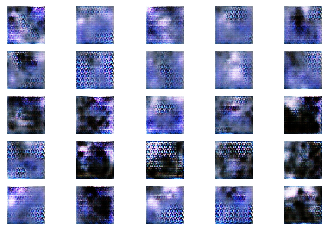

18 0.6690781 0.49246538 2.1789107
18 0.63540864 0.51611745 2.038026
18 0.6333362 0.5436063 2.2582417
18 0.5984027 0.74443924 2.0847971
18 0.60676926 0.60313034 2.1353922
18 0.67996156 0.52457404 2.400792
18 0.58503675 0.2156483 2.5304222
18 0.6181498 0.3477132 2.2740233
18 0.45226973 0.46448678 2.0258138
18 0.3230085 0.49585932 2.049943
18 0.42579025 0.51218843 1.7648575
18 0.49262527 0.50386643 1.6130368
18 0.45259163 0.54158556 1.4845729
18 0.5050788 0.5434848 1.5255536
18 0.5536276 0.5916823 1.8390484
18 0.507761 0.4577033 2.0054371
18 0.5813025 0.34450606 2.0252805
18 0.5017215 0.33063573 2.068965
18 0.4417439 0.38951325 2.1481602
18 0.5210474 0.4380753 2.0026248
18 0.4628611 0.37421644 1.9222589
18 0.4100668 0.48908263 1.8047869
18 0.45500943 0.44584006 1.9431125
18 0.45037287 0.5179938 1.7249161
18 0.42170215 0.44599348 1.8101983
18 0.45328304 0.4543542 1.7507908
18 0.4654051 0.5016744 1.9600313
18 0.5180798 0.54585576 2.0361269
18 0.42393523 0.4690741 1.877484
18 0.51159275 0.61

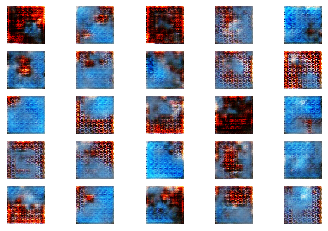

19 0.5638709 0.46834263 2.4848208
19 0.34227756 0.42458272 2.6236358
19 0.40541166 0.27023837 2.7053032
19 0.3673771 0.27000228 2.8709779
19 0.28098467 0.3303264 2.7148104
19 0.3694112 0.44894525 2.2982464
19 0.26191974 0.5403954 2.2684622
19 0.31601712 0.57213366 2.2198973
19 0.4705018 0.48438624 1.9395633
19 0.47990873 0.5215899 1.9456437
19 0.5541453 0.5019233 2.1400063
19 0.5378263 0.42519665 2.01631
19 0.5322073 0.42637858 1.9097983
19 0.49987608 0.34973687 2.1344326
19 0.5513958 0.4753105 2.0767927
19 0.38547528 0.40265512 2.1834223
19 0.49779376 0.47842515 2.2480664
19 0.5805876 0.4301774 2.1356015
19 0.4859902 0.384023 2.1586132
19 0.48659998 0.5117379 2.4461794
19 0.5185914 0.44809783 2.260754
19 0.52302575 0.6067712 2.4358356
19 0.72960925 0.44261858 2.1114366
19 0.53678465 0.51009005 2.0563915
19 0.64798725 0.53634965 2.1224775
19 0.68025166 0.51147544 2.0835032
19 0.69018155 0.5037912 1.7619412
19 0.43449438 0.5109264 1.7185543
19 0.42515314 0.46500906 1.6424321
19 0.613412

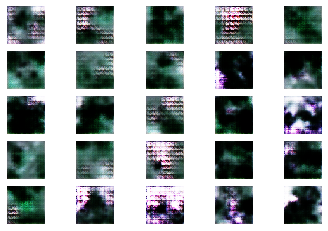

20 0.42933828 0.36962757 2.1158085
20 0.45918024 0.38075417 1.9155706
20 0.3906703 0.36335844 1.9600155
20 0.4316808 0.29606634 2.2000756
20 0.39354628 0.33771902 2.0517285
20 0.37546125 0.34788683 2.069619
20 0.4004976 0.35549477 1.9155123
20 0.38748688 0.49362352 1.9163004
20 0.31914 0.4080358 1.7762114
20 0.37245107 0.38538277 1.7890826
20 0.390295 0.40299833 1.5591743
20 0.29941636 0.6057302 1.6202307
20 0.27358326 0.5452012 2.0233684
20 0.37592328 0.49319416 2.1443622
20 0.3073662 0.4671916 2.0111868
20 0.42148572 0.38267043 2.148275
20 0.3571821 0.4214794 1.9420345
20 0.4135086 0.5922127 1.636009
20 0.3200861 0.5032179 2.0062716
20 0.4415065 0.71830547 2.1508136
20 0.5129496 0.5896592 1.9336057
20 0.73576677 0.5606961 1.7130055
20 0.71527076 0.5284471 1.7542539
20 0.49231783 0.46710712 1.8552706
20 0.42202452 0.5419604 2.2115648
20 0.5044316 0.28154105 2.4752119
20 0.6300006 0.27497503 2.5019784
20 0.57125384 0.27506682 2.1145945
20 0.3384038 0.38148248 2.1058714
20 0.47788057 0.

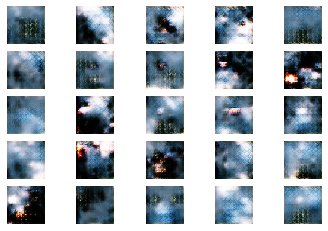

21 0.36278945 0.59079677 1.9127159
21 0.3595142 0.4261726 2.318592
21 0.40004438 0.364851 1.9864869
21 0.45721793 0.43677562 1.7314934
21 0.44147348 0.5320174 1.8957238
21 0.31673372 0.41024137 1.8795857
21 0.36679763 0.5039929 1.7787781
21 0.4766972 0.6226148 1.802743
21 0.4671641 0.55100226 1.8896972
21 0.40792698 0.46246043 2.0150304
21 0.46704894 0.4247097 2.382545
21 0.4468898 0.36259216 2.0853846
21 0.4232616 0.5310285 2.2741098
21 0.4627846 0.5767864 2.2909782
21 0.4805463 0.42582512 2.3506129
21 0.44034714 0.46908486 2.3220122
21 0.5466414 0.28009766 2.24869
21 0.49231243 0.457615 2.3554971
21 0.40612763 0.40460718 2.5352333
21 0.40164286 0.3272094 2.3932707
21 0.53508675 0.510195 2.334293
21 0.34160256 0.37416673 2.499358
21 0.49454883 0.3763132 2.1469889
21 0.445159 0.4451963 2.0407429
21 0.57574826 0.587744 1.9444015
21 0.49509007 0.3457819 2.3545873
21 0.58458304 0.41039526 2.370903
21 0.47918832 0.51162845 1.8750112
21 0.47788638 0.4328606 1.7899519
21 0.37878144 0.4321534

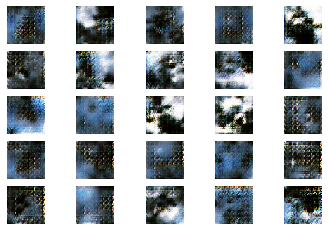

22 0.33824068 0.59083986 1.7570437
22 0.4422179 0.51070875 1.944627
22 0.476117 0.55925226 1.8046494
22 0.37325394 0.53019214 1.816676
22 0.46297076 0.39095414 2.1755033
22 0.5577562 0.4753459 2.195884
22 0.43139893 0.40838468 2.9276724
22 0.45635742 0.39349812 2.7805333
22 0.44659066 0.37853777 2.9013214
22 0.4710328 0.50158995 2.3083088
22 0.39144748 0.51214343 2.6955812
22 0.6009826 0.43459058 2.0275226
22 0.3880419 0.60184455 1.9339161
22 0.4176545 0.41543275 2.0684037
22 0.43049753 0.56040704 2.1244714
22 0.48381725 0.34426335 2.2010827
22 0.62793934 0.4142151 1.759142
22 0.44638675 0.53488994 1.8513728
22 0.5056357 0.403646 2.0179603
22 0.44366473 0.37061486 1.9805714
22 0.41457868 0.37956545 2.1646216
22 0.36828563 0.34150815 2.0882604
22 0.3908346 0.4035342 2.015416
22 0.36627543 0.43115848 2.3453765
22 0.41913086 0.49545574 2.240114
22 0.37884295 0.52515703 2.2826762
22 0.58809507 0.26079836 2.0609913
22 0.37888846 0.41841024 2.1553059
22 0.29164308 0.42595315 2.1372979
22 0.3

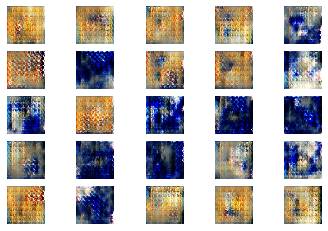

23 0.46719813 0.37846762 2.0862713
23 0.303804 0.4444381 2.4024236
23 0.2994444 0.41818398 2.1316104
23 0.33164102 0.47362012 2.041358
23 0.34774542 0.46576533 2.12906
23 0.6449567 0.6238502 1.8595794
23 0.40961677 0.71669686 1.8831146
23 0.49445492 0.5775527 1.8993473
23 0.6239139 0.698133 2.2321966
23 0.52911955 0.43662012 2.744208
23 0.62524414 0.28254968 2.4555984
23 0.47898218 0.46671924 2.2227602
23 0.47254288 0.5814004 2.615035
23 0.3887378 0.48664445 2.8177853
23 0.55655015 0.34742758 2.6150947
23 0.60956764 0.5172597 2.213376
23 0.55183923 0.5220492 2.2681632
23 0.5283714 0.37723422 2.5095825
23 0.61243826 0.48222113 2.7359228
23 0.40340102 0.47856143 3.0982294
23 0.41956127 0.41659743 2.6726463
23 0.507341 0.46595496 2.5769477
23 0.5292845 0.40465078 2.6187162
23 0.66414 0.50601786 2.3610759
23 0.41099763 0.35160148 2.5089874
23 0.64680487 0.30737737 2.0735857
23 0.513148 0.47515124 1.9953316
23 0.42740908 0.44320035 2.3082523
23 0.4348655 0.42115057 2.4900029
23 0.43649185 0

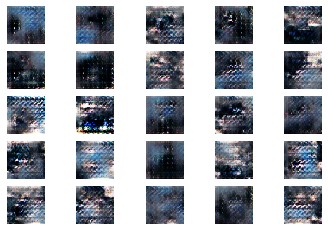

24 0.49057806 0.64146125 2.0155067
24 0.4769423 0.5531339 2.1034558
24 0.44295564 0.4914436 1.9853709
24 0.55106246 0.49170998 1.8980417
24 0.390283 0.6112329 1.7726026
24 0.43724215 0.5584556 1.7326092
24 0.486395 0.68691903 1.8291861
24 0.5231335 0.690054 1.7097397
24 0.61502135 0.48646086 1.7953111
24 0.45845872 0.40228915 1.8860573
24 0.542302 0.4660757 1.6942972
24 0.616519 0.7092172 1.6392863
24 0.56453943 0.50090945 1.8911738
24 0.54205614 0.35835063 1.6765584
24 0.5040125 0.53735054 1.6054966
24 0.41956955 0.48017865 2.034771
24 0.4491722 0.48269948 2.3212078
24 0.43432865 0.4522134 1.992183
24 0.51970136 0.38420033 1.9966178
24 0.40445507 0.52949667 1.9352365
24 0.36037403 0.5169848 2.1094677
24 0.46558833 0.44895467 2.135189
24 0.54021615 0.36911073 2.0542552
24 0.50387263 0.44608742 2.1399174
24 0.55516195 0.57172495 1.9300089
24 0.3185696 0.44526416 1.9268371
24 0.553956 0.37187317 1.8049978
24 0.41744196 0.5223911 2.017291
24 0.46884295 0.41703033 1.9980211
24 0.6035228 0.

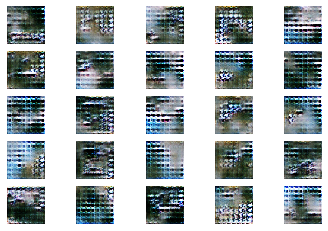

25 0.63637316 0.31447726 2.9918652
25 0.49483147 0.2947917 2.7997832
25 0.36034846 0.32818663 2.2638268
25 0.34370753 0.5575266 1.9938865
25 0.39813727 0.51202875 2.1947637
25 0.43458736 0.4345665 2.2637224
25 0.6667664 0.6625307 1.9601313
25 0.34152246 0.64789873 2.1061685
25 0.55987805 0.45469928 2.2065902
25 0.57955647 0.4705675 1.9100165
25 0.5640777 0.5235713 2.0237339
25 0.41726154 0.5188551 2.1179118
25 0.47197312 0.40869033 2.3271973
25 0.47929034 0.4127975 1.9836686
25 0.5315672 0.5043905 1.9322138
25 0.45538527 0.5238966 2.0371628
25 0.48105952 0.6090962 2.3081272
25 0.5446342 0.47487754 1.8618047
25 0.6767826 0.6175022 1.9663703
25 0.48215428 0.40735152 2.3747215
25 0.5920015 0.448539 2.1238244
25 0.5095403 0.4599263 1.9978328
25 0.4739741 0.42265898 2.0136137
25 0.38942683 0.32678336 2.0714219
25 0.33311406 0.36492938 2.0441284
25 0.46432748 0.3657605 1.9590021
25 0.4761735 0.59550494 1.8013836
25 0.5273963 0.5245949 2.0841181
25 0.6831701 0.47416174 1.8539169
25 0.3400974 

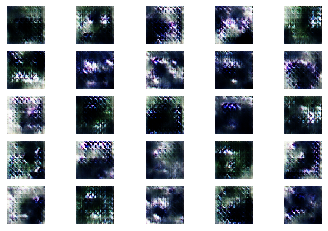

26 0.41922668 0.3397897 2.494106
26 0.5052028 0.45382422 2.0922132
26 0.5625375 0.5848286 2.0073028
26 0.3674557 0.46320778 2.4468007
26 0.4051796 0.4137653 2.2140589
26 0.44692034 0.42042917 2.4406726
26 0.42261946 0.35783315 2.5224848
26 0.36551178 0.37705815 2.316933
26 0.4136081 0.41196066 2.371342
26 0.38220826 0.5329815 2.2644048
26 0.51586306 0.4927941 2.4970315
26 0.4620508 0.3291669 2.1114645
26 0.45482934 0.59091806 1.9780145
26 0.40028033 0.51683104 1.5867774
26 0.40348983 0.49101657 1.835727
26 0.5390348 0.40504053 1.841548
26 0.3975875 0.40395665 1.6691949
26 0.516952 0.6743259 1.8424402
26 0.40978044 0.40651357 2.0694866
26 0.53943217 0.5145229 1.7705364
26 0.4974756 0.5279649 1.9399956
26 0.3842071 0.53582424 2.234204
26 0.5960684 0.3201036 2.2094083
26 0.50954485 0.37950313 2.0939841
26 0.5367984 0.4082867 2.2205791
26 0.40467095 0.39599138 2.195033
26 0.58567834 0.41646212 2.37695
26 0.43422416 0.35361686 2.429415
26 0.36416784 0.42519826 2.3447309
26 0.4422884 0.49018

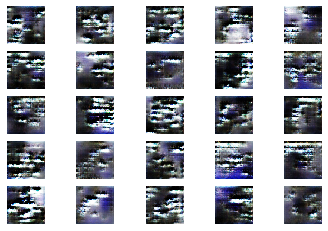

27 0.56868976 0.5305339 2.277751
27 0.75640815 0.71011996 2.141396
27 0.6467479 0.5659208 2.0840669
27 0.6202241 0.414857 2.4234116
27 0.48265323 0.31631607 2.122041
27 0.56941485 0.3802985 1.6739192
27 0.34954125 0.55649257 1.7831941
27 0.3030368 0.5204885 1.989433
27 0.46226996 0.37384963 2.0310924
27 0.44801125 0.58181745 1.9277943
27 0.5254353 0.42813778 1.9384607
27 0.46710745 0.46730372 1.9336739
27 0.44637033 0.51374155 2.4575188
27 0.42949015 0.486418 2.2069821
27 0.37581223 0.48426414 2.2259986
27 0.4423589 0.34091985 2.2535985
27 0.50597394 0.511142 2.1833565
27 0.42258123 0.44403666 2.1624746
27 0.4560119 0.4397705 2.0535526
27 0.4017636 0.45479745 2.1370153
27 0.3512395 0.4853363 2.0168123
27 0.32731235 0.50746286 2.095446
27 0.44377452 0.56485 2.1916714
27 0.61181635 0.5424224 2.2093034
27 0.60227144 0.42218608 2.3335433
27 0.52286494 0.38275993 2.4846716
27 0.40080482 0.3203925 3.1258795
27 0.3790211 0.2981683 3.2717693
27 0.34030038 0.134274 3.1167836
27 0.24847665 0.272

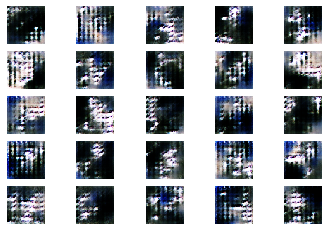

28 0.7054913 0.43988353 2.0361202
28 0.63464874 0.5102571 1.8519049
28 0.551222 0.52610356 2.2806225
28 0.50057495 0.5350789 2.197979
28 0.69433135 0.43068606 1.9592731
28 0.561441 0.63262826 2.215937
28 0.5192675 0.43129253 2.230155
28 0.47860175 0.21739842 2.116
28 0.6010624 0.5512754 2.112997
28 0.53570247 0.53834295 2.1974993
28 0.44712305 0.42846024 1.9925817
28 0.4906475 0.53462195 1.9260113
28 0.6695117 0.5947273 2.1248205
28 0.57656926 0.50545806 1.9131377
28 0.52312803 0.47709614 1.9838618
28 0.44078952 0.5710351 1.8904681
28 0.71013117 0.45793384 2.0515003
28 0.5133175 0.49281785 1.9972069
28 0.45862177 0.5152979 1.9863393
28 0.37328526 0.49603498 1.8871099
28 0.42557102 0.4711374 2.0496092
28 0.5292474 0.47052467 2.2576523
28 0.3686304 0.45165575 2.0444655
28 0.43998802 0.3615421 2.3003647
28 0.39436108 0.42544302 2.0586634
28 0.4146875 0.671371 1.8292422
28 0.5517981 0.6035422 2.2665064
28 0.44072646 0.5377779 2.871355
28 0.5442524 0.6368695 2.785323
28 0.60192084 0.4260077

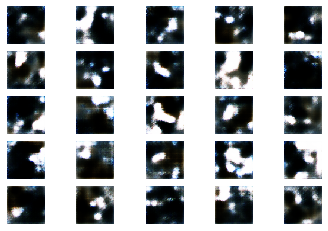

29 0.3480402 0.15024334 2.8728127
29 0.3516018 0.298628 2.7498004
29 0.3231088 0.2044372 3.0546355
29 0.44059223 0.1968355 2.646771
29 0.2458168 0.27416527 2.6560872
29 0.2168152 0.32892522 2.7228022
29 0.38011128 0.39609203 2.3560202
29 0.2810133 0.53591585 2.1358585
29 0.54781973 0.7088684 2.089185
29 0.4468745 0.56647354 2.0694444
29 0.44958794 0.4239103 2.3628025
29 0.30079028 0.43974003 2.3247504
29 0.24174647 0.6537663 2.6915236
29 0.4144398 0.44872382 3.0163283
29 0.41384834 0.5356839 2.8660774
29 0.56102383 0.37806487 3.1228116
29 0.5246153 0.23438331 3.1086888
29 0.29970616 0.42365044 3.0244603
29 0.21287039 0.5271548 2.3978603
29 0.38600183 0.5868401 2.3135228
29 0.47734076 0.57623494 2.3705068
29 0.4791805 0.4669096 2.357366
29 0.641294 0.5174779 2.2747278
29 0.6714337 0.49348867 1.9055139
29 0.51074916 0.46908095 1.8569674
29 0.50272226 0.64861894 1.9390874
29 0.56072736 0.5112504 2.0030832
29 0.5122382 0.46153077 2.4641619
29 0.375686 0.3980947 2.7273533
29 0.6722502 0.404

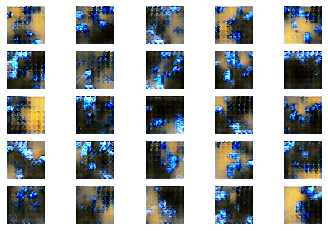

EPOCH: 0


In [23]:
train(g_model, d_model, gan_model, dataset, latent_dim, callback, 30,  128)

In [16]:
images = (images + 1) / 2

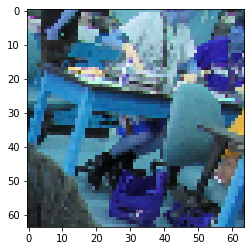

In [20]:
plt.imshow((images[0][58] + 1)/2)

In [19]:
images[0].shape


(10094, 64, 64, 3)